### View model outputs

In [151]:
import numpy as np
import segmentation_models_pytorch as smp
import torch
import matplotlib.pyplot as plt
from xingu_dataset_v6.onehotencoding import OneHotEncoding

In [152]:
x01 = np.load('xingu_dataset_v6/scenes_allbands/allbands_x01.npy')
x01 = x01[:, :, [6, 4, 3]].transpose(2, 0, 1)
x01.shape

(3, 843, 1230)

In [153]:
x01 = x01[:, :832, :1216]

In [154]:
model = torch.load('models/FromScratch-DeepLabV3Plus-Shortwave Infrared.pth')

In [155]:
x01 = torch.Tensor(x01).to('cuda')
x01 = x01.unsqueeze(0)

In [156]:
x01.shape

torch.Size([1, 3, 832, 1216])

In [157]:
model.eval()
with torch.no_grad():
    out = model(x01)

In [158]:
out = out.cpu()

In [159]:
out = np.asarray(out).squeeze()
encoder = OneHotEncoding(3)
out = encoder.decode(out)

In [160]:
np.unique(out)

array([2, 3])

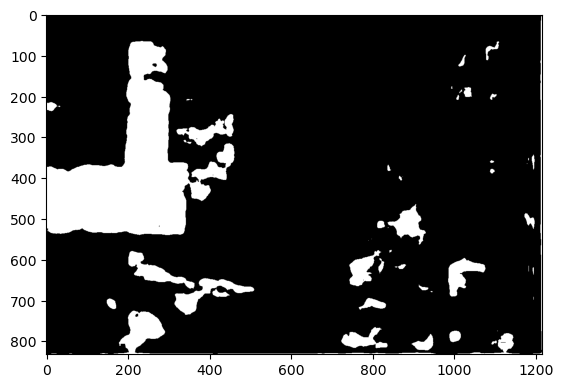

In [161]:
out = np.where(out == 3, 0., 1.)
plt.imshow(out, cmap='gray')

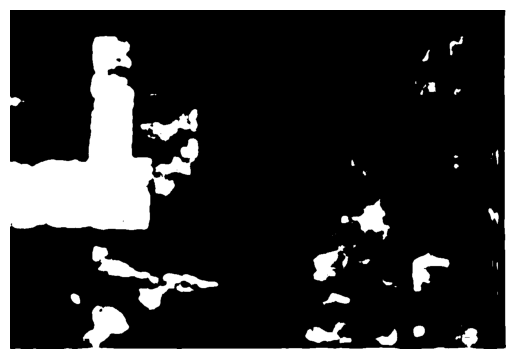

In [163]:
plt.axis('off')
plt.imshow(out, cmap='gray')
plt.savefig('/home/ebneto//foresteyes/slic-masks-xingu/aoba.png', bbox_inches='tight', pad_inches=0)